# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import tensorflow as tf
import os
import math
from sklearn.cross_validation import train_test_split

EPOCHS = 30
BATCH_SIZE = 128
MAX_LEARNING_RATE=0.001
MIN_LEARNING_RATE=0.001 #learning rate decay hurt accuracy (thinking not enough epochs)
DECAY_SPEED=2000.0
PKEEP_TRAIN=0.75

# training data saved to this directory, but checked in as get_data.sh script (files too large for github)

training_file = 'data/train.p'
testing_file = 'data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

X, y = train['features'], train['labels']
#split the training data into 80% train and 20% validation
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)
X_test, y_test = test['features'], test['labels']

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# Number of training examples
n_train = len(X_train)

# Number of validation examples
n_validation = len(X_valid)

# Number of testing examples.
n_test = len(X_test)

# What's the shape of an traffic sign image?  We will later change this to grayscale 
image_shape = X_train[0].shape

# How many unique classes/labels there are in the dataset.
n_classes = y_train.max()+1

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 31367
Number of validation examples = 7842
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

1


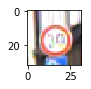

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import numpy as np
import random
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()
    
plt.figure(figsize=(1,1))
plt.imshow(image)
print(y_train[index])



### Histogram

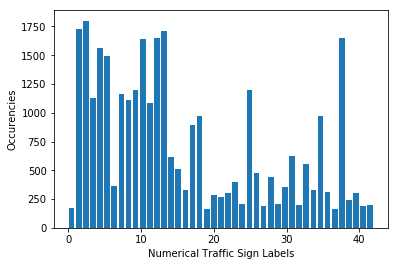

In [5]:
%matplotlib inline
hist, bins = np.histogram(y_train, bins=n_classes)
width = 0.8 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.xlabel('Numerical Traffic Sign Labels')
plt.ylabel('Occurencies')
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

I normalized the image data should to have mean zero and equal variance. 

I also converted the images from RGB to Grayscale, reducing the dimensions from 32,32,3 to 32,32,1. This increased my training accuracy by 8%!

In [6]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
def rgb2gray(rgb):
        if len(rgb.shape) == 4:
                G = np.zeros([len(rgb), rgb.shape[1], rgb.shape[2], 1])
                for i, img in enumerate(rgb):
                        r, g, b = img[:,:,0], img[:,:,1], img[:,:,2]
                        gray = (0.2989 * r + 0.5870 * g + 0.1140 * b)
                        G[i] = gray.reshape(rgb.shape[1], rgb.shape[2],1)
                return G
        else:
                r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
                gray = (0.2989 * r + 0.5870 * g + 0.1140 * b)
                return gray
            
def normalize(img):
    img = rgb2gray(img)
    img = (img-128)/128
    return img

#turn RGB to grayscale images (this improved accuracy by 8%)            
X_train = normalize(X_train)
X_valid = normalize(X_valid)
X_test = normalize(X_test)

image_shape = X_train[0].shape
print("New image data shape =", image_shape)

from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

New image data shape = (32, 32, 1)


### Model Architecture
I used the LeNet architecture, slightly modified:
1. Input layer: (32,32,1)
2. Layer  1: convolution with weights normalized with a mean of 0 and standard deviation of 0.1. Biases set to 0. Stride of 1, no padding
  - output shape: 28,28,6
  - activation: ReLU
  - applied dropout on 25% of the activation output
3. Layer 2: Added pooling layer with stride of 2 and ksize of 2 (no padding)
  - output shape: 14,14,6
4. Layer 3: convolution with weights normalized with a mean of 0 and standard deviation of 0.1. Biases set to 0. Stride of 1, no padding
  - output shape: 10,10,16
  - activation: ReLU
  - applied dropout on 25% of the activation output
5. Layer 4: Added pooling layer with stride of 2 and ksize of 2 (no padding)
  - output shape: 5,5,16
6. Flatten output to vector of size 400
7. Layer 5: fully-connected layer with weights normalized with a mean of 0 and standard deviation of 0.1. Biases set to 0.
  - output vector length: 120
  - applied dropout of 25%
7. Layer 6: fully-connected layer with weights normalized with a mean of 0 and standard deviation of 0.1. Biases set to 0.
  - output vector length: 84
  - applied dropout of 25%
8. Layer 7: Output layer. Fully-connected layer with weights normalized with a mean of 0 and standard deviation of 0.1. Biases set to 0.
  - output vector length: 10 (logits)
  

In [7]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
from tensorflow.contrib.layers import flatten

def LeNet(x, pkeep):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, X_train[0].shape[2], 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    #dropout
    conv1 = tf.nn.dropout(conv1, pkeep)
    
    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)
    
    #dropout
    conv2 = tf.nn.dropout(conv2, pkeep)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    
    #dropout
    fc1 = tf.nn.dropout(fc1, pkeep)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    
    #dropout
    fc2 = tf.nn.dropout(fc2, pkeep)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, n_classes), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### Train, Validate and Test the Model  - 99% Accuracy

I am using Adam Optimizer, calculating the loss using the mean of cross entropy output.
Batch size: 128 
Epoch size: 30
Learning rate: 0.001 (I had intended for decaying learning rate, but that didn't seem to improve training accuracy)
Model saved for further use without need for re-training.

In [8]:
pkeep = tf.placeholder(tf.float32, name='dropout')
x = tf.placeholder(tf.float32, (None, 32, 32, X_train[0].shape[2]))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
#rate = 0.001

logits = LeNet(x, pkeep)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
learning_rate = tf.placeholder(tf.float32, name='learning-rate')
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
training_operation = optimizer.minimize(loss_operation)


correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, pkeep:1.})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    batch_count = num_examples/BATCH_SIZE
    for epoch in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        offset = batch_count * epoch
        for i in range(0, num_examples, BATCH_SIZE):
            end = i + BATCH_SIZE
            iter = offset + i
            batch_x, batch_y = X_train[i:end], y_train[i:end]
            rate = MIN_LEARNING_RATE + (MAX_LEARNING_RATE - MIN_LEARNING_RATE) * math.exp(-iter/DECAY_SPEED)
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, learning_rate: rate, pkeep:PKEEP_TRAIN})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(epoch+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './traffic_sign_classifier')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.734

EPOCH 2 ...
Validation Accuracy = 0.881

EPOCH 3 ...
Validation Accuracy = 0.924

EPOCH 4 ...
Validation Accuracy = 0.946

EPOCH 5 ...
Validation Accuracy = 0.957

EPOCH 6 ...
Validation Accuracy = 0.965

EPOCH 7 ...
Validation Accuracy = 0.968

EPOCH 8 ...
Validation Accuracy = 0.970

EPOCH 9 ...
Validation Accuracy = 0.974

EPOCH 10 ...
Validation Accuracy = 0.977

EPOCH 11 ...
Validation Accuracy = 0.982

EPOCH 12 ...
Validation Accuracy = 0.981

EPOCH 13 ...
Validation Accuracy = 0.982

EPOCH 14 ...
Validation Accuracy = 0.986

EPOCH 15 ...
Validation Accuracy = 0.986

EPOCH 16 ...
Validation Accuracy = 0.983

EPOCH 17 ...
Validation Accuracy = 0.984

EPOCH 18 ...
Validation Accuracy = 0.985

EPOCH 19 ...
Validation Accuracy = 0.986

EPOCH 20 ...
Validation Accuracy = 0.988

EPOCH 21 ...
Validation Accuracy = 0.985

EPOCH 22 ...
Validation Accuracy = 0.988

EPOCH 23 ...
Validation Accuracy = 0.987

EPOCH 24 ...
Validation Accura

## Calculate model accuracy on provided test set - 94.7%
I'm putting this here to avoid running the test multiple times.

Originally, I ran Lenet without dropout and I achieved a 99% training accuracy, but a 91% test-validation accuracy. Dropout brought the accuracy up to 95%

In [9]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.947


---

## Step 3: Test a Model on New Images

The images were taken from [this PDF](http://www.adcidl.com/pdf/Germany-Road-Traffic-Signs.pdf). 


### Load and Output the Images

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


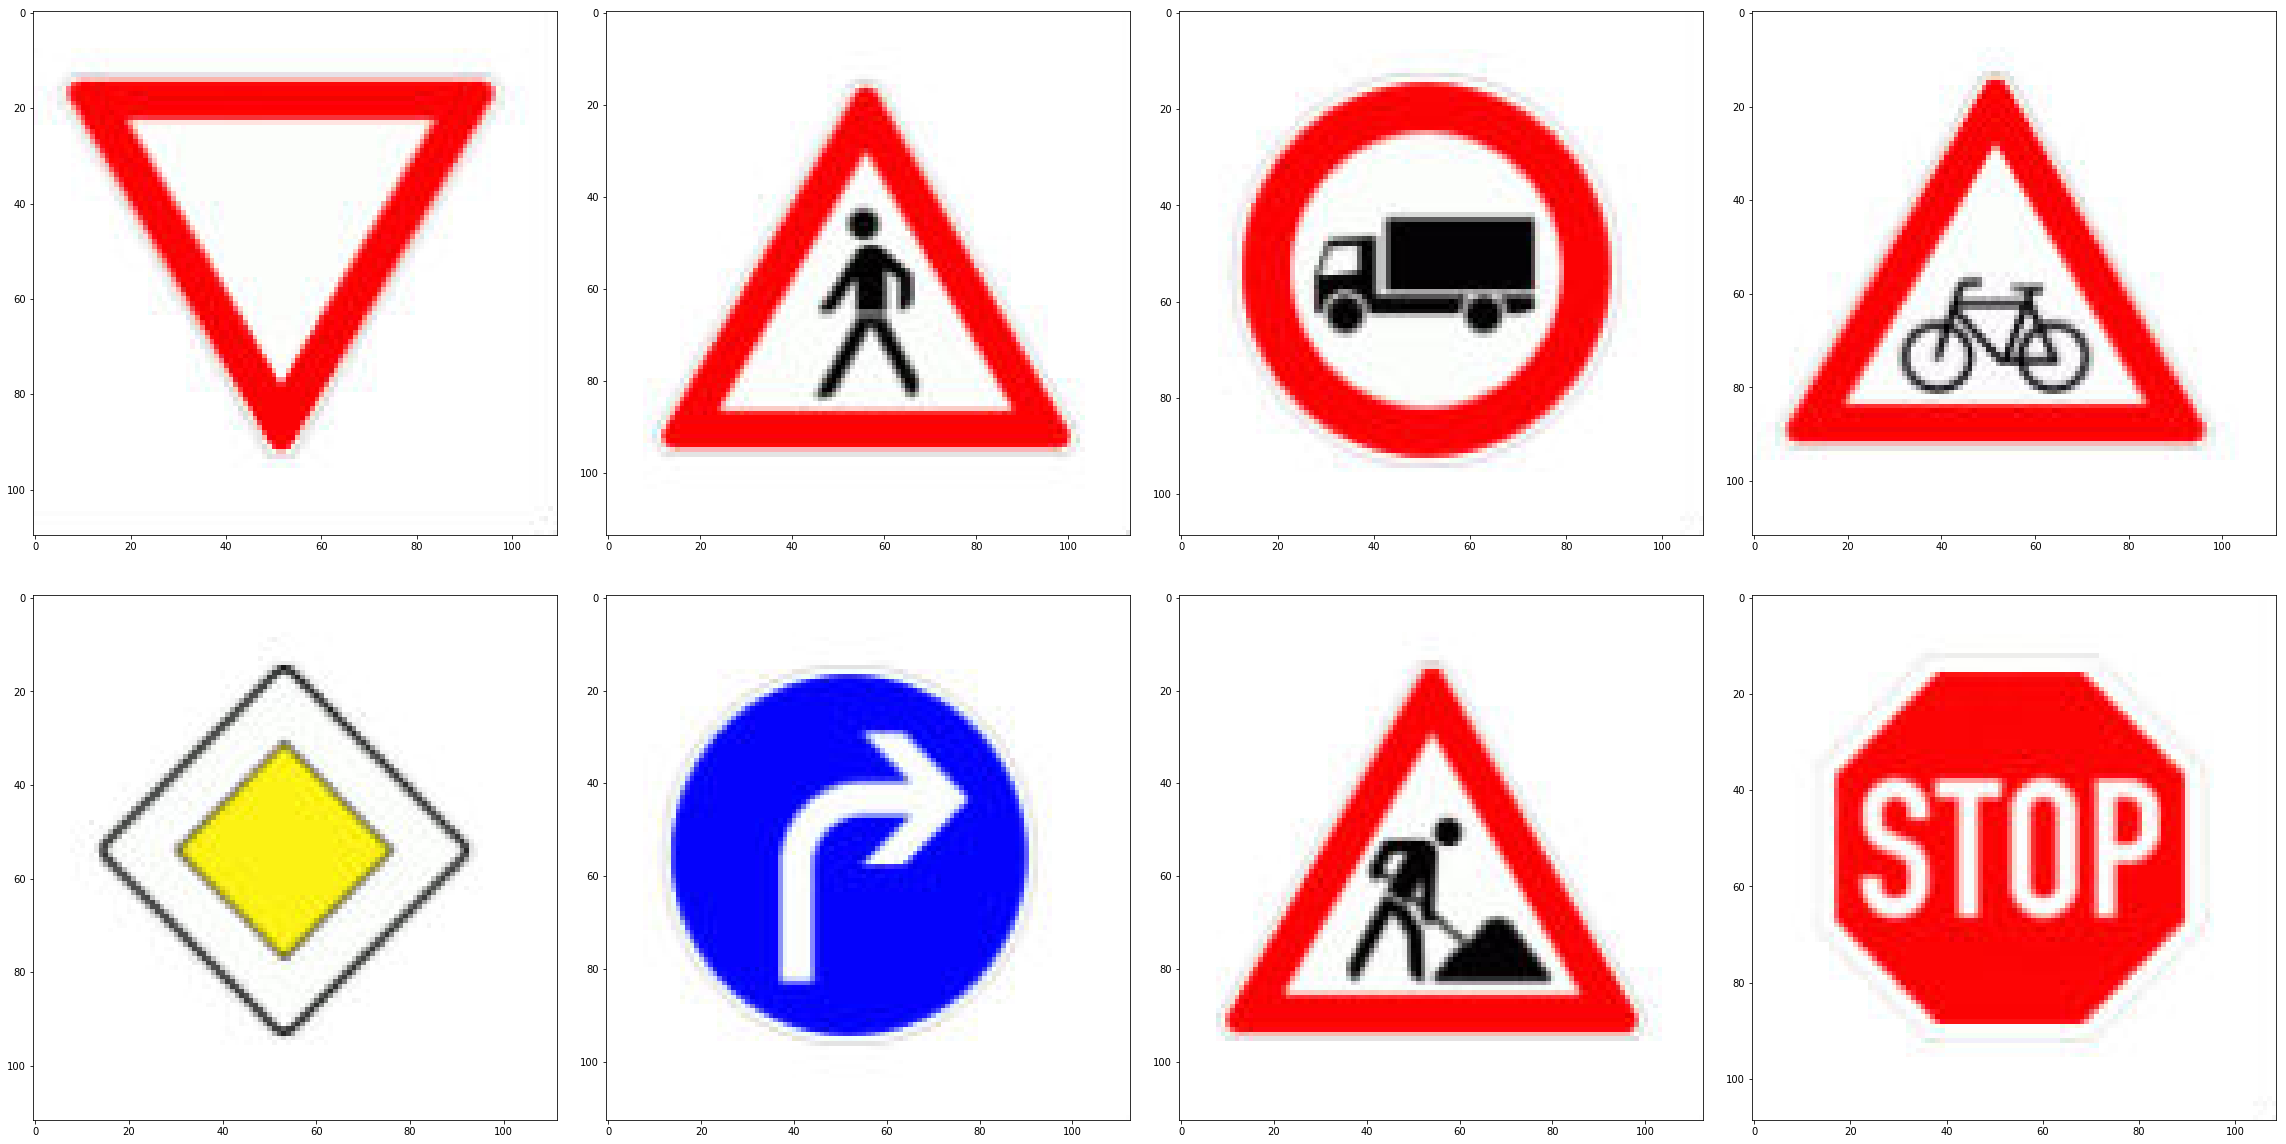

In [10]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
# Visualizations will be shown in the notebook.
import matplotlib.image as mpimg
%matplotlib inline

figure = plt.figure(figsize=(32,32), tight_layout={'h_pad':4})
for idx, file in enumerate(os.listdir('new_image_data')):
    if '.jpg' in file:
        subplot = figure.add_subplot(4,4,idx+1) 
        image = mpimg.imread('new_image_data/' + file)
        subplot.imshow(image)
plt.show()

### Predict the Sign Type for Each Image
image size is 102,102. I convert to 32,32 and apply grayscale and normalization. I use argmax to get the predicted logit which is used to locate the appropriate label from the signames.csv file

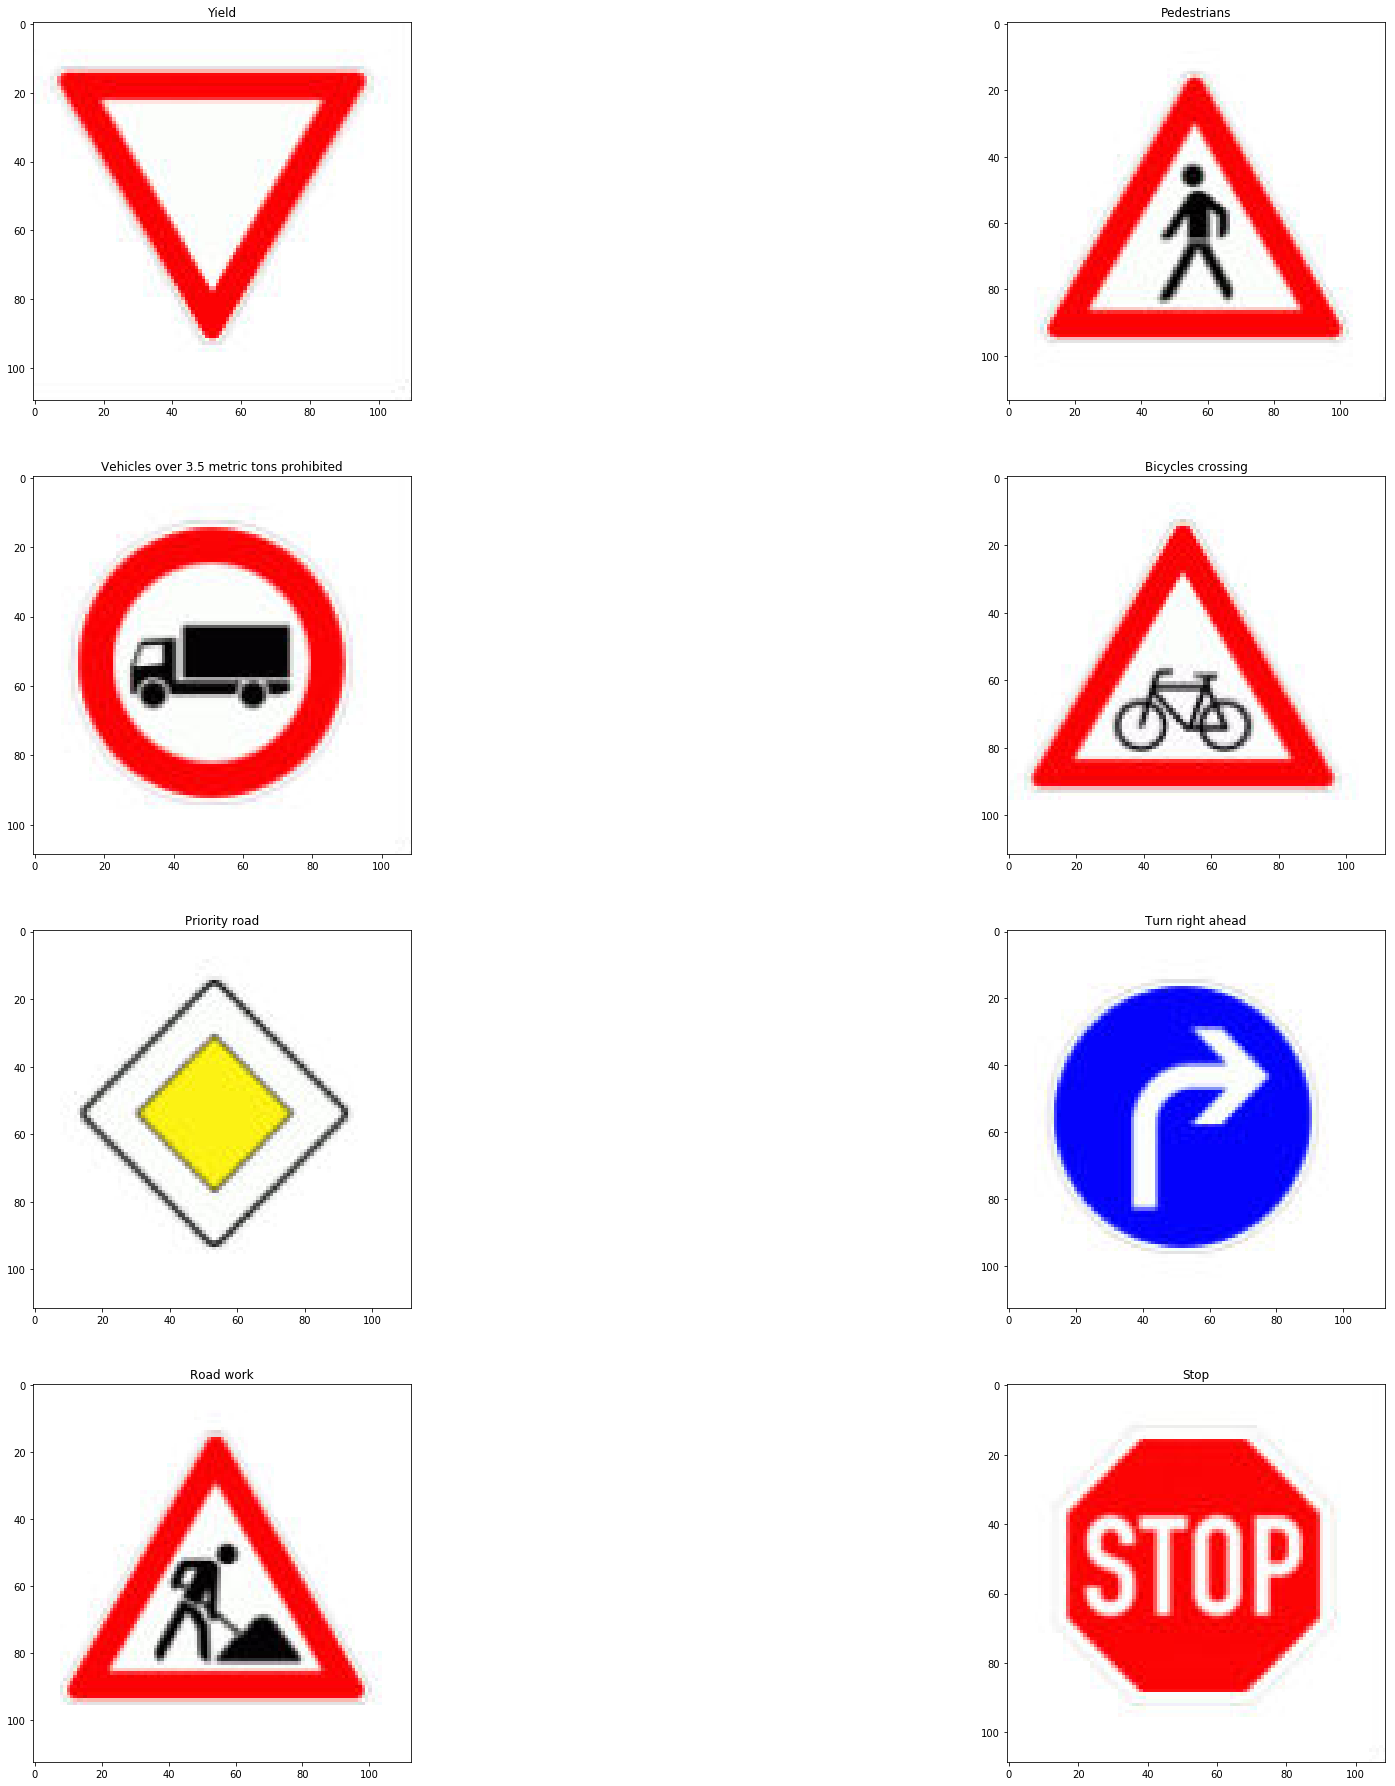

In [11]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
import csv
from PIL import Image

label_dict = None
with open('signnames.csv', mode='r') as infile:
    reader = csv.reader(infile)
    next(reader, None)
    label_dict = {int(rows[0]):rows[1] for rows in reader}
    
    
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    figure = plt.figure(figsize=(32,32))
    for idx, file in enumerate(os.listdir('new_image_data')):
        if '.jpg' in file:
            image = Image.open('new_image_data/' + file)
            image.thumbnail((32,32), Image.ANTIALIAS)
            image = normalize(np.array([np.array(image)]))
            logit = sess.run(tf.argmax(logits, 1), feed_dict={x:image, pkeep:1.0})
            subplot = figure.add_subplot(4,2,idx+1) 
            img = mpimg.imread('new_image_data/' + file)
            subplot.imshow(img)
            subplot.set_title(label_dict[logit[0]])


### Analyze Performance
I eyeballed it, and the 8 images analyzed were 100% accurate.

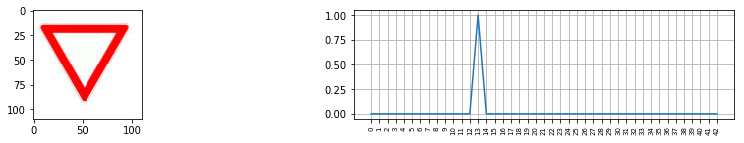

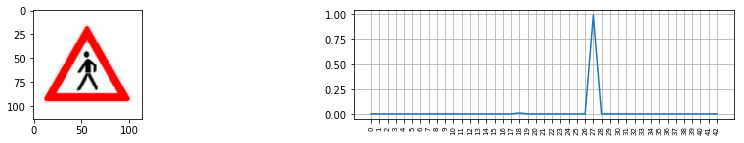

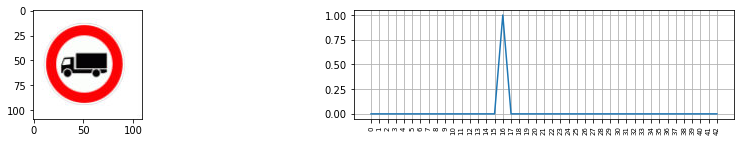

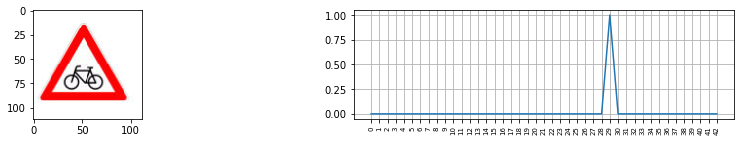

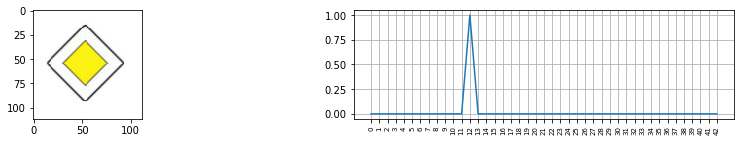

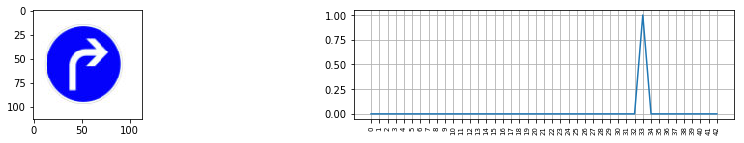

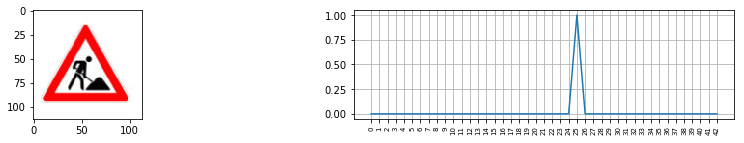

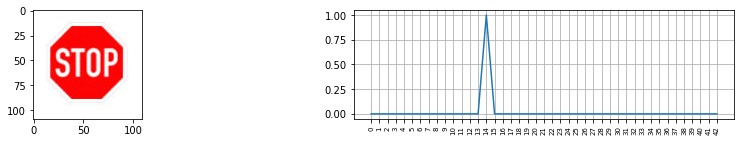

In [14]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
import os, sys
import numpy as np
from PIL import Image
import warnings
from skimage import exposure
import pandas as pd

### Histogram Equilization
def normalized_image(image_data):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        return np.array([exposure.equalize_adapthist(image, clip_limit=0.03) for image in image_data])

size = 32, 32
softmax_prob = None
top5_array = []

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    sess = tf.get_default_session()
    
    i = 0
    for file in os.listdir('new_image_data'):
        if '.jpg' in file:
            image = Image.open('new_image_data/' + file)
            image.thumbnail((32,32), Image.ANTIALIAS)
            image = normalize(np.array([np.array(image)]))
            softmax = tf.nn.softmax(logits)
            top5 = tf.nn.top_k(softmax, k=5, sorted=True)
            softmax_prob, top5_val = sess.run([softmax, top5], feed_dict={x:image, pkeep:1.})
            top5_array.append(top5_val)
            figure = plt.figure(figsize=(15,2))
            subplot = figure.add_subplot(1,2,1) 
            img = mpimg.imread('new_image_data/' + file)
            subplot.imshow(img)
            
            subplot = figure.add_subplot(1,2,2) 
            subplot.set_xticks(np.arange(0,43,1))
            plt.plot(softmax_prob[0])
            for tick in subplot.xaxis.get_major_ticks():
                tick.label.set_fontsize('x-small') 
                tick.label.set_rotation('vertical')
            plt.grid()
            plt.show()

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [15]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
for top5_val in top5_array:
    print(top5_val)


TopKV2(values=array([[  1.00000000e+00,   1.52336016e-13,   1.94979374e-17,
          2.47758936e-18,   1.23624663e-19]], dtype=float32), indices=array([[13, 34, 12, 38, 40]], dtype=int32))
TopKV2(values=array([[  9.91013229e-01,   8.98637623e-03,   3.68736778e-07,
          7.43885531e-09,   3.86033532e-11]], dtype=float32), indices=array([[27, 18, 11, 24, 26]], dtype=int32))
TopKV2(values=array([[  1.00000000e+00,   5.70349190e-09,   7.41681647e-11,
          3.38198913e-11,   2.78385117e-13]], dtype=float32), indices=array([[16, 40,  9,  7, 10]], dtype=int32))
TopKV2(values=array([[  9.99994397e-01,   5.59153750e-06,   5.63399460e-08,
          6.77337475e-09,   9.29481436e-10]], dtype=float32), indices=array([[29, 28, 22, 23, 20]], dtype=int32))
TopKV2(values=array([[  9.99849200e-01,   1.02684091e-04,   3.83870829e-05,
          5.32308013e-06,   1.26958503e-06]], dtype=float32), indices=array([[12,  9, 15, 13, 40]], dtype=int32))
TopKV2(values=array([[  9.99983430e-01,   1.650253

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")